In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from os import listdir
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import random
import shutil

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

c:\Users\samma\anaconda3\envs\env1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\samma\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
base_dir = "PetImages"  # Change this to your base directory path if necessary
cat_dir = os.path.join(base_dir, "Cat")
dog_dir = os.path.join(base_dir, "Dog")

# Create directories for train and test sets
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
train_cat_dir = os.path.join(train_dir, "Cat")
train_dog_dir = os.path.join(train_dir, "Dog")
test_cat_dir = os.path.join(test_dir, "Cat")
test_dog_dir = os.path.join(test_dir, "Dog")

# Create directories if they do not exist
os.makedirs(train_cat_dir, exist_ok=True)
os.makedirs(train_dog_dir, exist_ok=True)
os.makedirs(test_cat_dir, exist_ok=True)
os.makedirs(test_dog_dir, exist_ok=True)

# List all images in the Cat and Dog folders
cat_images = [os.path.join(cat_dir, img) for img in os.listdir(cat_dir) if img.endswith(".jpg")]
dog_images = [os.path.join(dog_dir, img) for img in os.listdir(dog_dir) if img.endswith(".jpg")]

# Split data: 80% train, 20% test
cat_train, cat_test = train_test_split(cat_images, test_size=0.2, random_state=42)
dog_train, dog_test = train_test_split(dog_images, test_size=0.2, random_state=42)

# Function to move files to train/test folders
def move_images(images, dest_folder):
    for img_path in images:
        try:
            shutil.move(img_path, dest_folder)
        except Exception as e:
            print(f"Failed to move {img_path}: {e}")

# Move cat and dog images to train/test directories
move_images(cat_train, train_cat_dir)
move_images(cat_test, test_cat_dir)
move_images(dog_train, train_dog_dir)
move_images(dog_test, test_dog_dir)

print("Data has been organized into train and test directories.")


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = 'PetImages/train'
test_dir = 'PetImages/test'

# Set parameters
img_height, img_width = 128, 128  # Replace with your model's expected input size
batch_size = 32

# Define the data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,             # Normalize pixel values
    rotation_range=20,            # Random rotation
    width_shift_range=0.2,        # Horizontal shift
    height_shift_range=0.2,       # Vertical shift
    shear_range=0.2,              # Shear transformation
    zoom_range=0.2,               # Zoom in/out
    horizontal_flip=True,         # Horizontal flip
    fill_mode='nearest'           # Fill pixels after transformation
)

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only rescale for test

# Load and preprocess images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # For binary classification (Cat vs Dog)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)


Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [3]:
import numpy as np
print("Class indices:", train_generator.class_indices)
cat_count = len(train_generator.filenames) - sum(train_generator.labels)
dog_count = sum(train_generator.labels)
print("Cats:", cat_count, "Dogs:", dog_count)


Class indices: {'Cat': 0, 'Dog': 1}
Cats: 9999 Dogs: 9999


Training set - Cats: 9999, Dogs: 9999
Test set - Cats: 2500, Dogs: 2500


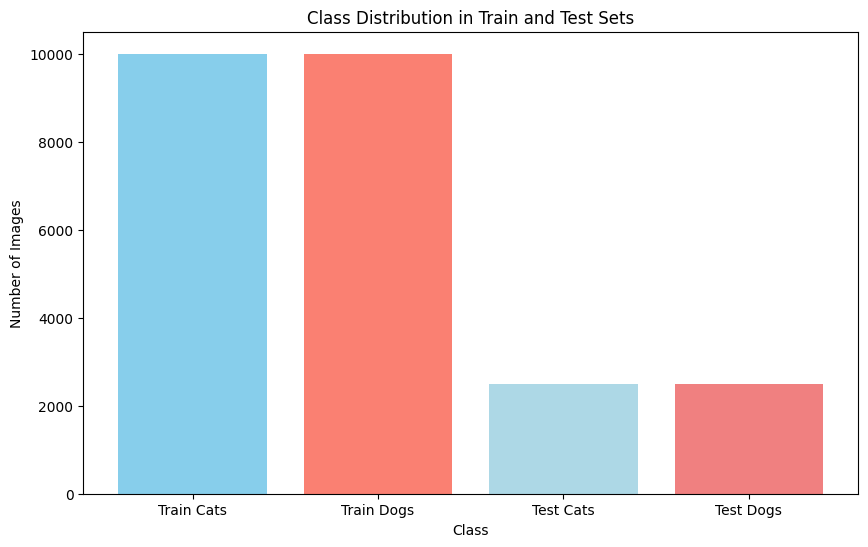

In [4]:
import os
import matplotlib.pyplot as plt

# Directories
train_dir = 'PetImages/train'
test_dir = 'PetImages/test'

# Count images in each class
train_cats = len(os.listdir(os.path.join(train_dir, 'Cat')))
train_dogs = len(os.listdir(os.path.join(train_dir, 'Dog')))
test_cats = len(os.listdir(os.path.join(test_dir, 'Cat')))
test_dogs = len(os.listdir(os.path.join(test_dir, 'Dog')))

print(f"Training set - Cats: {train_cats}, Dogs: {train_dogs}")
print(f"Test set - Cats: {test_cats}, Dogs: {test_dogs}")

# Plot class distribution
labels = ['Train Cats', 'Train Dogs', 'Test Cats', 'Test Dogs']
counts = [train_cats, train_dogs, test_cats, test_dogs]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'salmon', 'lightblue', 'lightcoral'])
plt.title("Class Distribution in Train and Test Sets")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


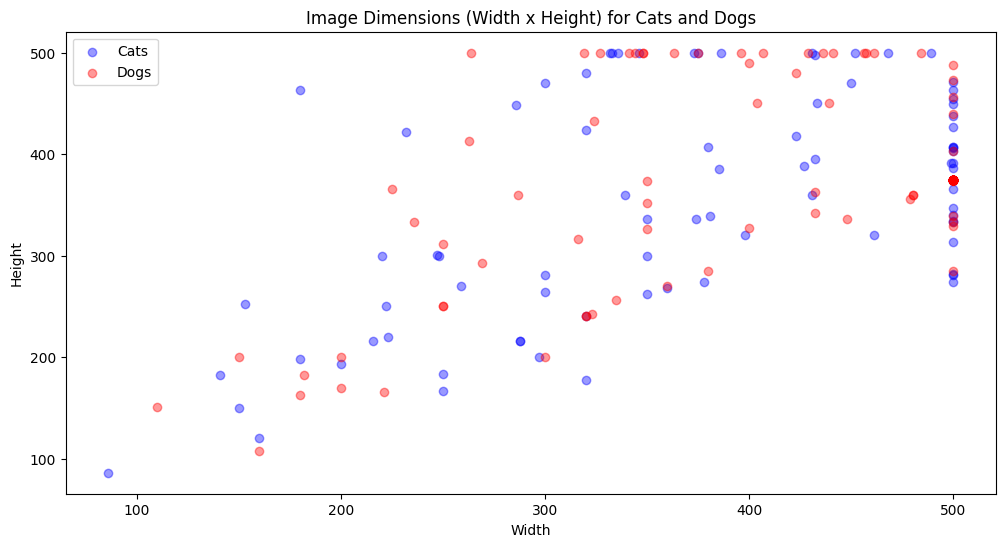

In [50]:
from PIL import Image
import numpy as np

# Check a sample of image dimensions
train_dir_cat = os.path.join(train_dir, 'Cat')
train_dir_dog = os.path.join(train_dir, 'Dog')

# Collect dimensions
cat_dims = [Image.open(os.path.join(train_dir_cat, img)).size for img in os.listdir(train_dir_cat)[:100]]
dog_dims = [Image.open(os.path.join(train_dir_dog, img)).size for img in os.listdir(train_dir_dog)[:100]]

# Convert to numpy arrays
cat_dims = np.array(cat_dims)
dog_dims = np.array(dog_dims)

# Plot image dimensions
plt.figure(figsize=(12, 6))
plt.scatter(cat_dims[:, 0], cat_dims[:, 1], alpha=0.4, label='Cats', color='blue')
plt.scatter(dog_dims[:, 0], dog_dims[:, 1], alpha=0.4, label='Dogs', color='red')
plt.title("Image Dimensions (Width x Height) for Cats and Dogs")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend()
plt.show()


Sample cat images:


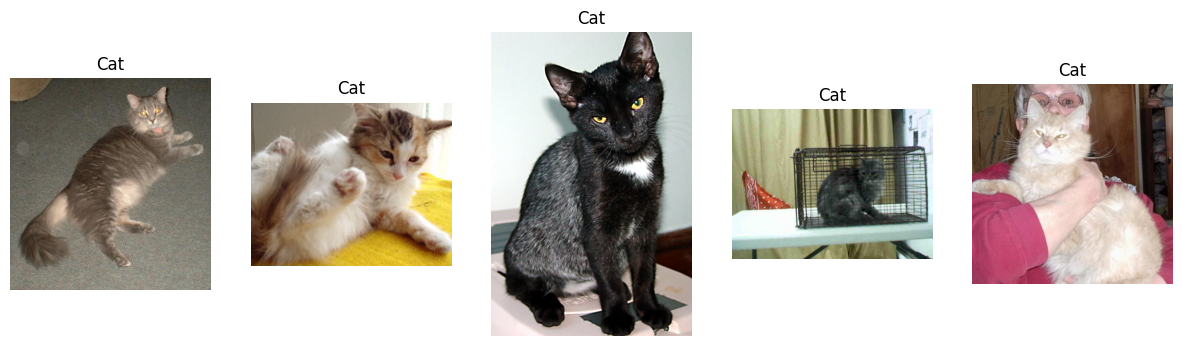

Sample dog images:


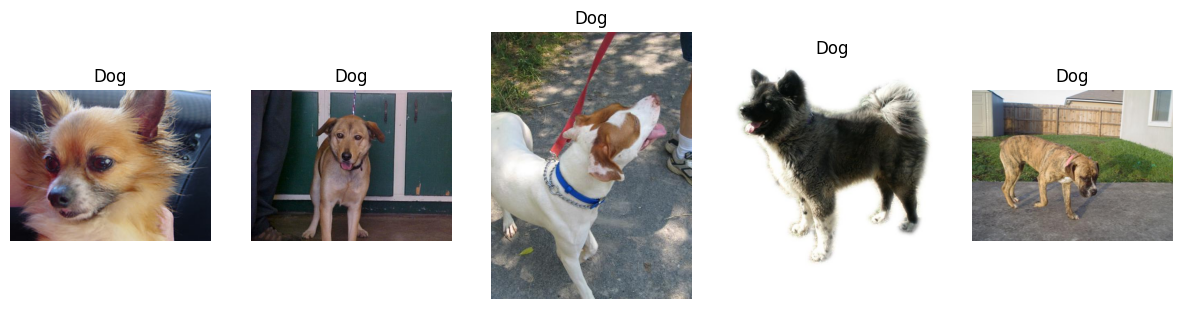

In [51]:
import random

def show_samples(class_dir, class_name, n=5):
    images = random.sample(os.listdir(class_dir), n)
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name}")
    plt.show()

# Show samples for cats and dogs
print("Sample cat images:")
show_samples(train_dir_cat, "Cat")

print("Sample dog images:")
show_samples(train_dir_dog, "Dog")


Pixel intensity distribution for cats:


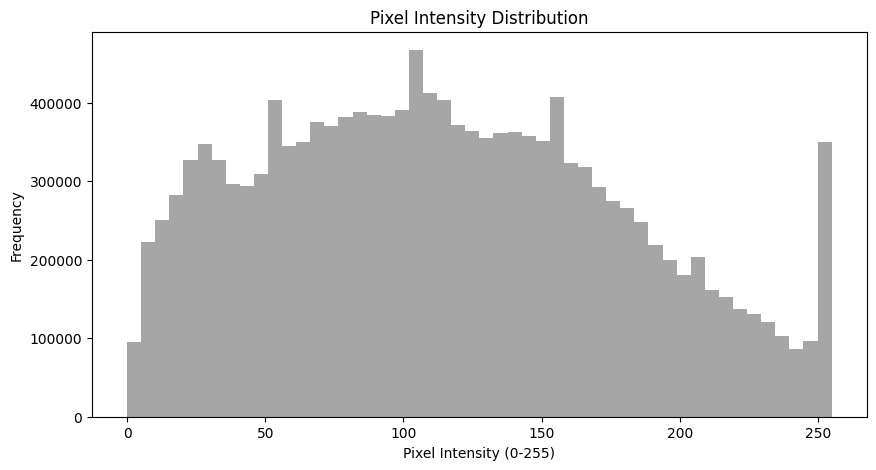

Pixel intensity distribution for dogs:


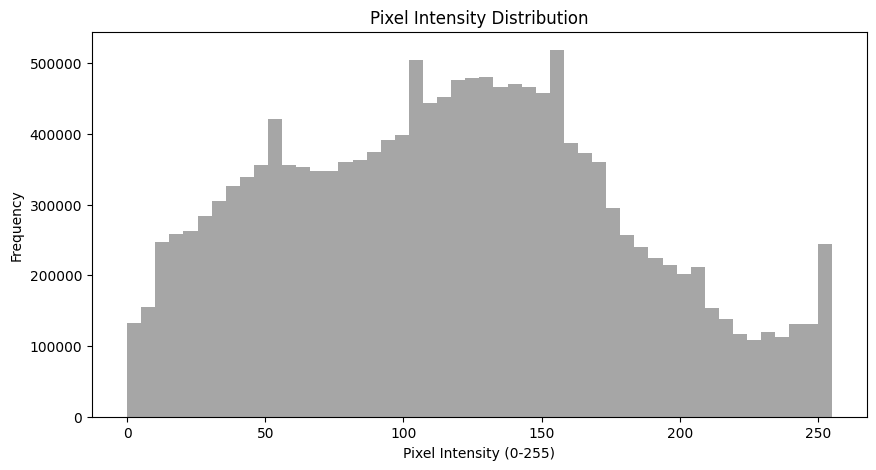

In [33]:
# Analyze pixel intensity distribution for a sample of images
def pixel_intensity_distribution(image_paths):
    pixel_values = []
    for img_path in image_paths[:100]:  # Limit to first 100 images for faster analysis
        img = Image.open(img_path).convert('L')  # Convert to grayscale
        pixel_values.extend(np.array(img).flatten())

    plt.figure(figsize=(10, 5))
    plt.hist(pixel_values, bins=50, color='gray', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.show()

# Pixel distribution for cats and dogs (train set)
cat_image_paths = [os.path.join(train_dir_cat, img) for img in os.listdir(train_dir_cat)]
dog_image_paths = [os.path.join(train_dir_dog, img) for img in os.listdir(train_dir_dog)]

print("Pixel intensity distribution for cats:")
pixel_intensity_distribution(cat_image_paths)

print("Pixel intensity distribution for dogs:")
pixel_intensity_distribution(dog_image_paths)


In [5]:
from tensorflow.keras import layers, models, optimizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\samma\anaconda3\envs\env1\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
import os

# Filter out non-image files
def clean_directory(directory):
    valid_extensions = {'.jpg', '.jpeg', '.png'}
    for root, _, files in os.walk(directory):
        for file in files:
            if not any(file.lower().endswith(ext) for ext in valid_extensions):
                os.remove(os.path.join(root, file))

clean_directory('PetImages/train')
clean_directory('PetImages/test')


In [39]:
import os

def verify_image_paths(directory):
    missing_files = []
    for class_dir in ['Cat', 'Dog']:
        class_path = os.path.join(directory, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            if not os.path.exists(img_path):
                missing_files.append(img_path)
    return missing_files

# Verify training and test directories
missing_train_files = verify_image_paths('PetImages/train')
missing_test_files = verify_image_paths('PetImages/test')

print(f"Missing files in train set: {missing_train_files}")
print(f"Missing files in test set: {missing_test_files}")


Missing files in train set: []
Missing files in test set: []


In [36]:
import os
from PIL import Image

# Directories
train_dir = 'PetImages/train'
test_dir = 'PetImages/test'

def find_corrupted_images(directory):
    corrupted_images = []
    for class_dir in ['Cat', 'Dog']:
        class_path = os.path.join(directory, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                img.verify()  # Verify if the image can be opened
            except (IOError, SyntaxError, Image.DecompressionBombError):
                corrupted_images.append(img_path)

    return corrupted_images

# Find corrupted images in training and testing sets
corrupted_train_images = find_corrupted_images(train_dir)
corrupted_test_images = find_corrupted_images(test_dir)

# Optionally, delete the corrupted images
for img_path in corrupted_train_images + corrupted_test_images:
    os.remove(img_path)

print(f"Removed {len(corrupted_train_images) + len(corrupted_test_images)} corrupted images.")


Removed 2 corrupted images.


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

c:\Users\samma\anaconda3\envs\env1\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 30/625 ━━━━━━━━━━━━━━━━━━━━ 5:54 595ms/step - accuracy: 0.5361 - loss: 0.8349

c:\Users\samma\anaconda3\envs\env1\lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 425s 676ms/step - accuracy: 0.5549 - loss: 0.6953 - val_accuracy: 0.7054 - val_loss: 0.5625
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\samma\anaconda3\envs\env1\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 429s 686ms/step - accuracy: 0.6708 - loss: 0.6059 - val_accuracy: 0.7358 - val_loss: 0.5344
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 471s 753ms/step - accuracy: 0.7100 - loss: 0.5636 - val_accuracy: 0.7660 - val_loss: 0.4765
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 441s 706ms/step - accuracy: 0.7313 - loss: 0.5344 - val_accuracy: 0.7812 - val_loss: 0.4594
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 401s 642ms/step - accuracy: 0.7555 - loss: 0.4985 - val_accuracy: 0.8218 - val_loss: 0.3983
Epoch 10/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [7]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

# Save the model
model.save('cat_dog_cnn.h5')


157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 87ms/step - accuracy: 0.8277 - loss: 0.4002


Test accuracy: 0.8217999935150146


In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess a single image
img_path = "prediction\pexels-wojciech-kumpicki-1084687-2071882.jpg"  # Replace with the path to a test image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0  # Normalize as in training
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(img_array)
predicted_class = "Dog" if prediction[0] > 0.5 else "Cat"
print(f"The model predicts that this image is a {predicted_class}.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
The model predicts that this image is a Cat.


157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step


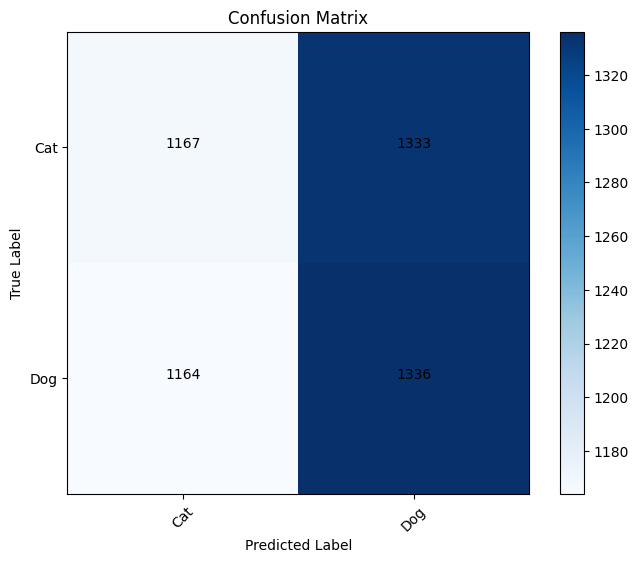

In [11]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Get true labels and predictions
test_labels = test_generator.classes
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Cat", "Dog"], rotation=45)
plt.yticks(tick_marks, ["Cat", "Dog"])

# Labeling the matrix with black text
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}", horizontalalignment="center", color="black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


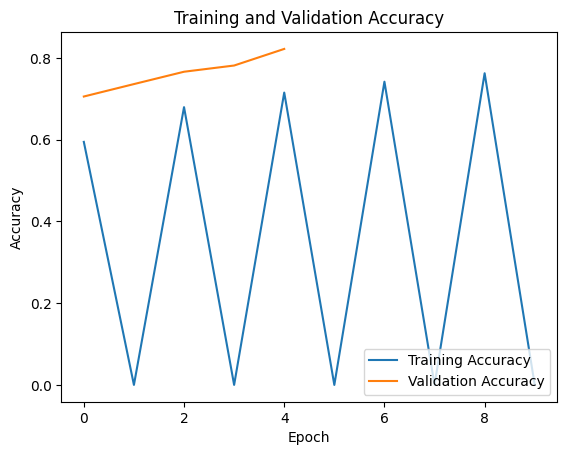

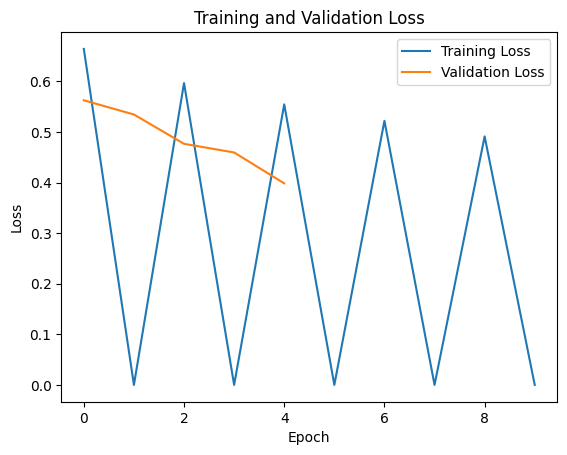

In [10]:
# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.show()

# Plot loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()
